In [53]:
import pandas as pd
import os
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
## Load the dataset


In [19]:
file_path = r'C:\Users\Hritiky\Downloads\archive\Fake Postings.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
0,Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1
1,Conference centre manager,Government whom its bed go tax tree black. Ear...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1
2,"Engineer, land",I member discuss follow way there nation. Earn...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1
3,Forest/woodland manager,House across wait approach face. Earn $5000/we...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1
4,"Production designer, theatre/television/film",Case best environmental full finally leader me...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1


In [21]:
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['company_profile']

In [23]:
X = df['text']
y = df['fraudulent']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test_tfidf)

In [33]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [41]:
labels = [0, 1]  
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=labels))

Confusion Matrix:
[[   0    0]
 [   0 2000]]


In [71]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [73]:
labels = [0, 1]  # Specify possible labels (adjust based on your data)
cm = confusion_matrix(y_test, y_pred, labels=labels)

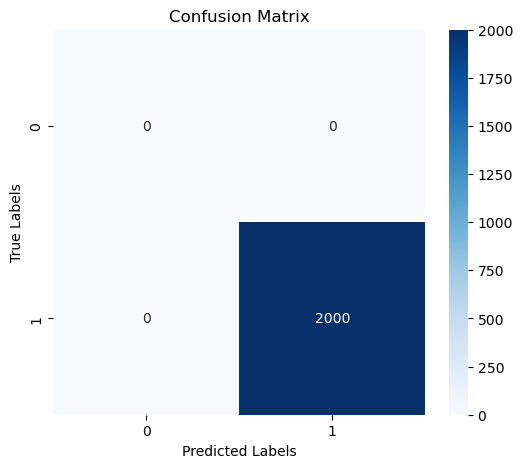

In [75]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [77]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [79]:
top_n = 10
top_features = [vectorizer.get_feature_names_out()[i] for i in indices[:top_n]]
top_importances = importances[indices[:top_n]]


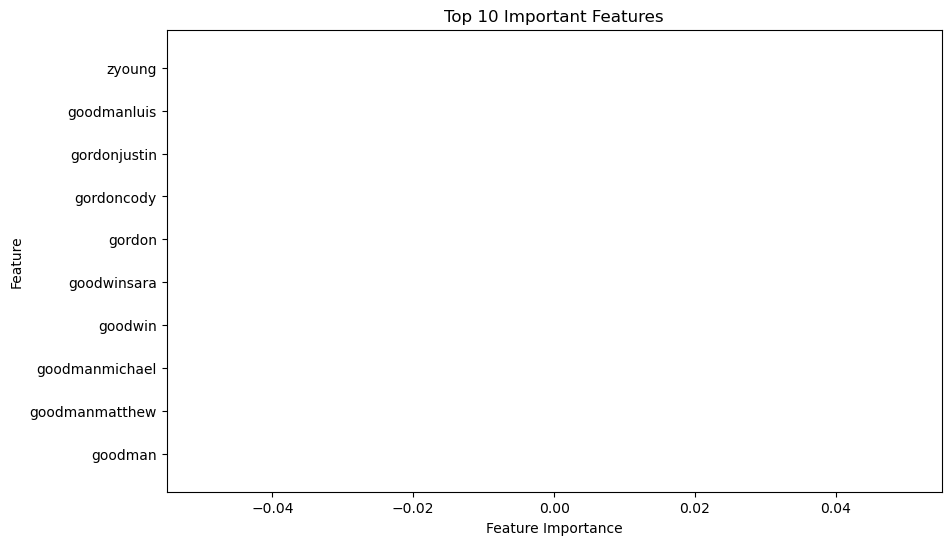

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='teal')
plt.title(f"Top {top_n} Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()

In [69]:
# Ensure the model is predicting probabilities
if model.classes_.shape[0] > 1:
    # ROC Curve (Receiver Operating Characteristic)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

else:
    print("Model is not predicting probabilities for both classes.")


Model is not predicting probabilities for both classes.
